In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2012-05-18 to 2020-09-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      2101 non-null   float64
 1   AMZN    2101 non-null   float64
 2   AAPL    2101 non-null   float64
 3   NFLX    2101 non-null   float64
 4   GOOG    2101 non-null   float64
dtypes: float64(5)
memory usage: 98.5 KB


In [4]:
mydata.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,213.850006,16.368652,9.994286,299.078979
2012-05-21,34.029999,218.110001,17.322281,10.248571,305.908386
2012-05-22,31.000000,215.330002,17.189274,9.672857,299.278229
2012-05-23,32.000000,217.279999,17.608683,10.272857,303.592072
2012-05-24,33.029999,215.240005,17.446974,10.038571,300.702881


In [5]:
mydata.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-09-17,254.820007,3008.729980,110.339996,470.200012,1495.530029
2020-09-18,252.529999,2954.909912,106.839996,469.959991,1459.989990
2020-09-21,248.149994,2960.469971,110.080002,487.350006,1431.160034
2020-09-22,254.750000,3128.989990,111.809998,491.170013,1465.459961
2020-09-23,252.779999,3064.209961,110.300003,480.029999,1439.079956


### Normalization to 100:

In [6]:
mydata.iloc[0]

FB       38.230000
AMZN    213.850006
AAPL     16.368652
NFLX      9.994286
GOOG    299.078979
Name: 2012-05-18 00:00:00, dtype: float64

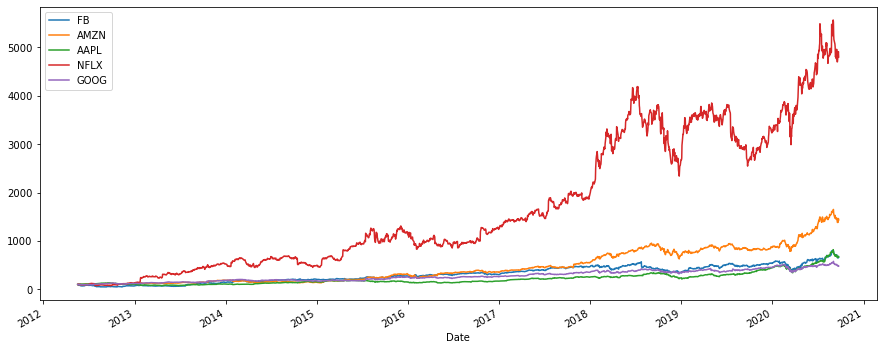

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

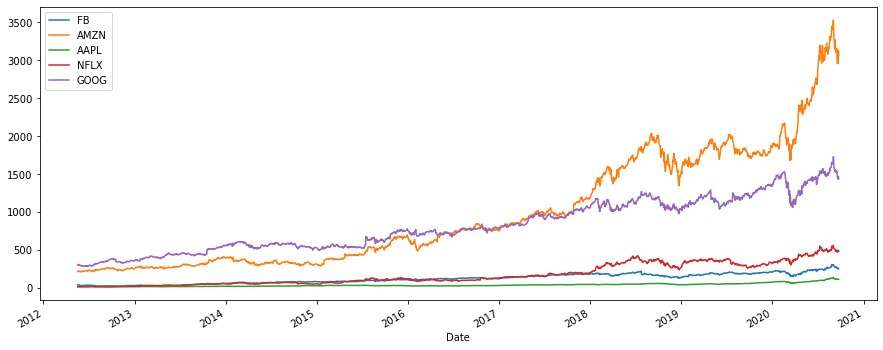

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['2012-05-18']

FB       38.230000
AMZN    213.850006
AAPL     16.368652
NFLX      9.994286
GOOG    299.078979
Name: 2012-05-18 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

FB       38.230000
AMZN    213.850006
AAPL     16.368652
NFLX      9.994286
GOOG    299.078979
Name: 2012-05-18 00:00:00, dtype: float64

## Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058259,0.025443,0.022835
2012-05-22,-0.089039,-0.012746,-0.007678,-0.056175,-0.021674
2012-05-23,0.032258,0.009056,0.024399,0.062029,0.014414
2012-05-24,0.032187,-0.009389,-0.009183,-0.022806,-0.009517


In [12]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [13]:
np.dot(returns, weights)

array([        nan,  0.00331929, -0.0374624 , ...,  0.00642388,
        0.02620818, -0.0165246 ])

In [14]:
annual_returns = returns.mean() * 250
annual_returns

FB      0.293683
AMZN    0.362383
AAPL    0.267286
NFLX    0.572825
GOOG    0.218729
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.34298118938360084

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

34.298 %


In [17]:
weights_2 = np.array([0.4, 0.3, 0.2, 0.05, 0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

34.298 %
31.922 %
